In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge



In [5]:
df_train = pd.read_csv('/Users/willponczak/Desktop/Computer Science/python/housePricePrediction/downloads/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/Users/willponczak/Desktop/Computer Science/python/housePricePrediction/downloads/house-prices-advanced-regression-techniques/test.csv')

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train.dtypes[df_train.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

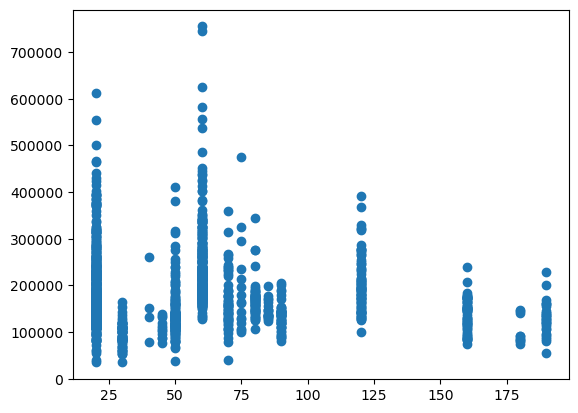

In [9]:
# Finding Outliers
# MSSubClass is the buildings subclass
plt.scatter(x='MSSubClass', y='SalePrice', data=df_train)


'It looks like there are some outliers around 300 and \nthere is a positive trend from about 20-100'

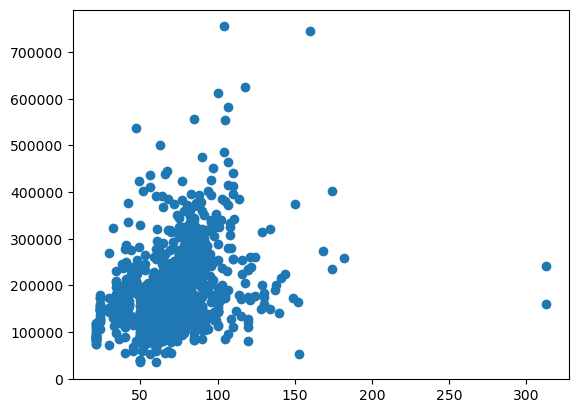

In [10]:
# Finding Outliers
# Lot Frontage
plt.scatter(x='LotFrontage', y='SalePrice', data=df_train)
"""It looks like there are some outliers around 300 and 
there is a positive trend from about 20-100"""

In [11]:
# Specifically getting the outliers
df_train.query('LotFrontage > 300')
# Drop 935, 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


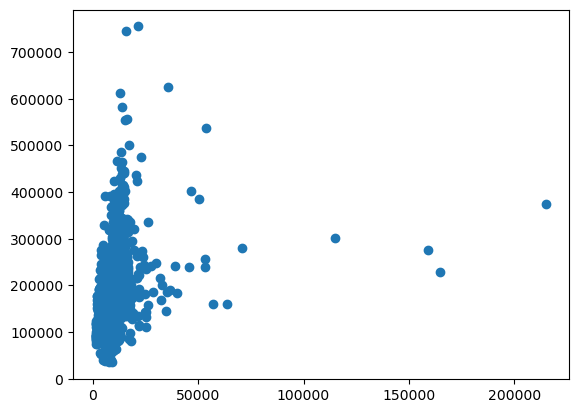

In [12]:
# Getting the outliers for the lot area
plt.scatter(x='LotArea', y='SalePrice', data=df_train)
# Looks like there are some outliers past 55,000

In [13]:
# querying the data for all LotAreas above 55,000 to find the outliers
df_train.query('LotArea > 55000')
# Drop 250, 314, 336, 707 (These look to be more outlierish compared to the others)
#Maybe drop 1397

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [14]:
# How to do z-scores
# This is the technical way of finding the outliers instead of using your eyes
stats.zscore(df_train['LotArea']).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

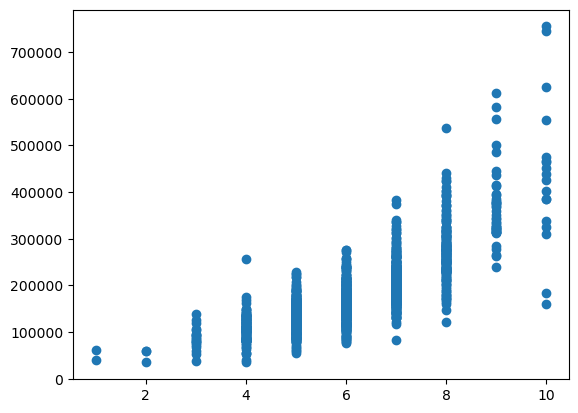

In [15]:
# Looking through Overall Quality for outliers
plt.scatter(x='OverallQual', y='SalePrice', data=df_train)


In [16]:
# Querying the Overall quality data
df_train.query('OverallQual == 10')
# Maybe 524
#Maybe check out other numbers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
224,225,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,386250
389,390,60,RL,96.0,12474,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,426000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
515,516,20,RL,94.0,12220,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,New,Partial,402861
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


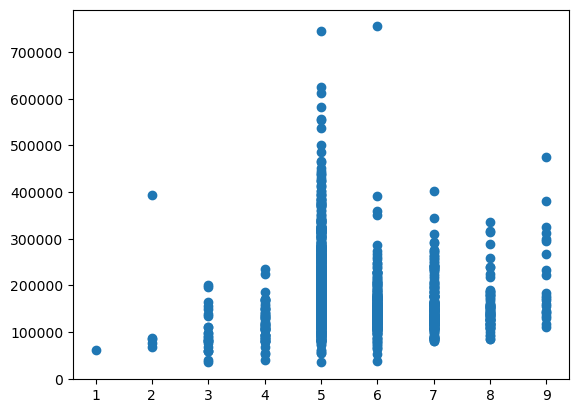

In [17]:
# Overall Condition
plt.scatter(x='OverallCond', y='SalePrice', data=df_train)
# Notice how there are some very high sales (2)

In [18]:
# Querying for Overall Condition
df_train.query('OverallCond == 2')
# Drop 379

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
250,251,30,RL,55.0,5350,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,Shed,450,5,2010,WD,Normal,76500
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432
398,399,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


In [19]:
# Querying for Overall Condition
df_train.query('OverallCond == 5 & SalePrice > 700000')
# Drop 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [20]:
# Querying for Overall Condition
df_train.query('OverallCond == 6 & SalePrice > 700000')
# Drop 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


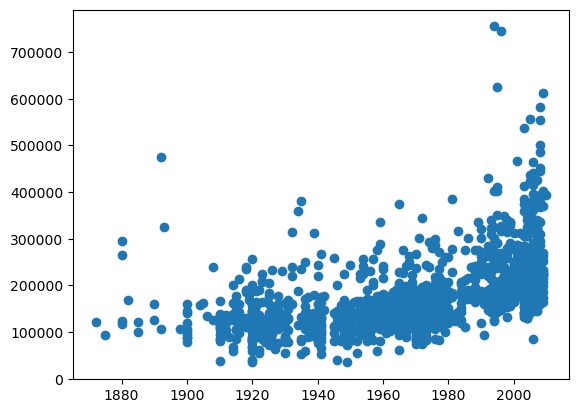

In [21]:
# Year Built
plt.scatter(x='YearBuilt', y='SalePrice', data=df_train)

In [22]:
# Querying for the outlier between 1880-1900 for around 500,000
df_train.query('YearBuilt < 1900 & YearBuilt >= 1885')
# Drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
106,107,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
716,717,70,RM,60.0,10800,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,159500
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000
945,946,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900
1292,1293,70,RM,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,107500
1416,1417,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500


In [23]:
# Querying for the outliers between 1980 - 2000 for 700,000+
df_train.query('YearBuilt < 2000 & YearBuilt > 1980 & SalePrice > 600000')
# Maybe drop 692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


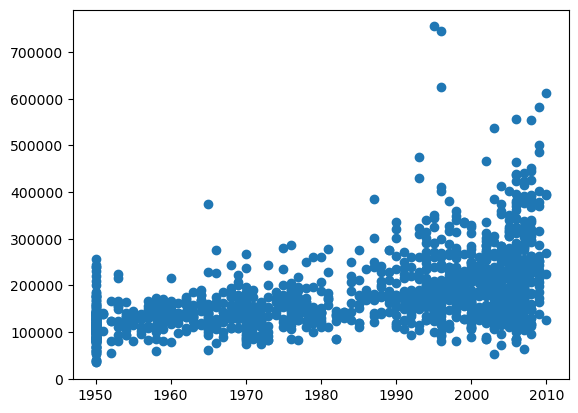

In [24]:
# Year Remodeled
plt.scatter(x='YearRemodAdd', y='SalePrice', data=df_train)

In [25]:
# Querying
df_train.query('YearRemodAdd > 1990 & SalePrice > 700000')
# Both of these were maybes from above.
# Drop 692, 1183

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


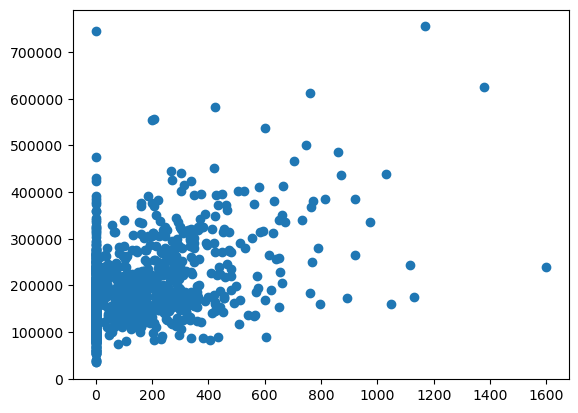

In [26]:
# Masonry Veneer Area (sqf)
plt.scatter(x='MasVnrArea', y='SalePrice', data=df_train)

In [27]:
# Querying
df_train.query('MasVnrArea < 10 & SalePrice > 700000')
# 1183 is already on the drop list

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [28]:
# Querying
df_train.query('MasVnrArea > 1100 & SalePrice > 600000')
# Drop 1170, 692

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000


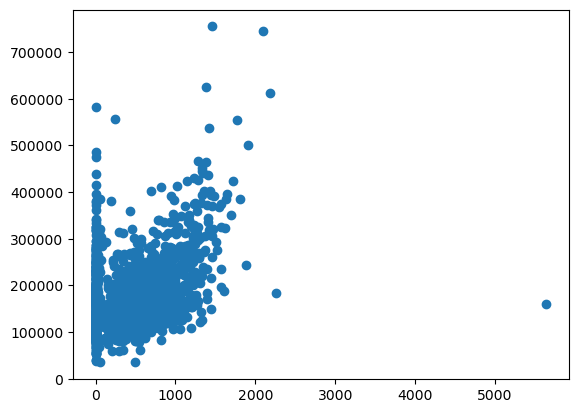

In [29]:
# Basement type 1 finished square feet
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=df_train)

In [30]:
# Querying
df_train.query('SalePrice < 200000 & BsmtFinSF1 > 5000')
# Drop 1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [31]:
# Querying
df_train.query('BsmtFinSF1 < 3000 & SalePrice > 700000')
# 692, 1183 are already on the drop list

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


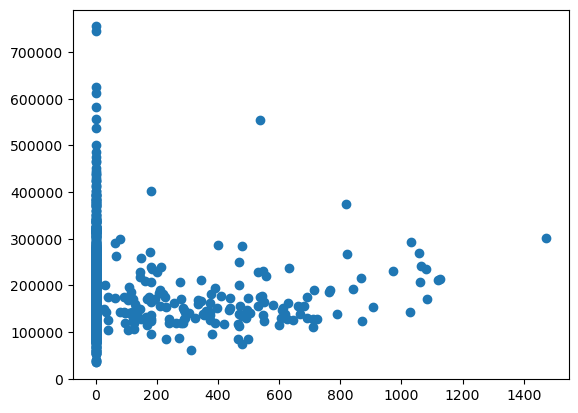

In [32]:
# Basement Finish type 2
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=df_train)

In [33]:
# Querying
df_train.query('BsmtFinSF2 > 1400')
# drop 323

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,323,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal,301000


In [34]:
# Querying
df_train.query('BsmtFinSF2 > 400 & SalePrice > 500000')
# Maybe drop 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000


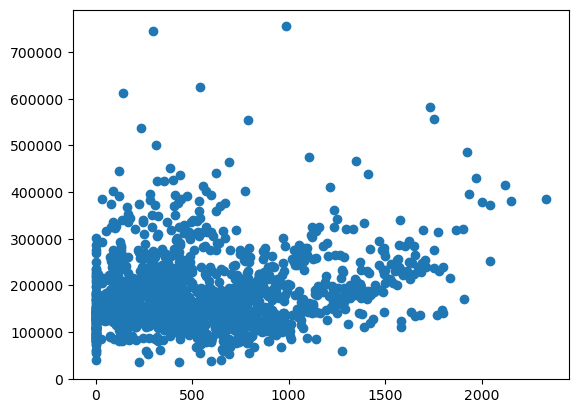

In [35]:
# Basement Unfinished SF
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=df_train)

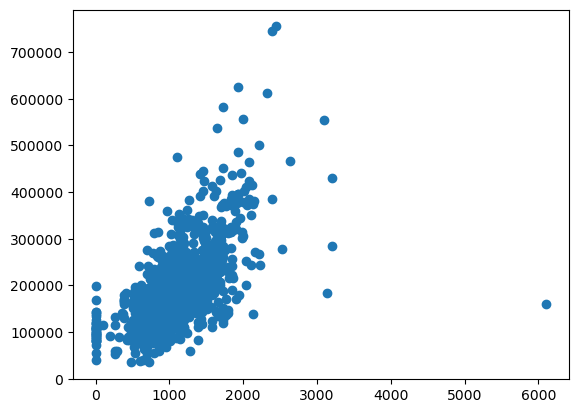

In [36]:
# Total Basement SF
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=df_train)

In [37]:
# Querying
df_train.query('TotalBsmtSF > 6000')
# 1299 is already on the drop list

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [38]:
# Querying
df_train.query('TotalBsmtSF > 3000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,430000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


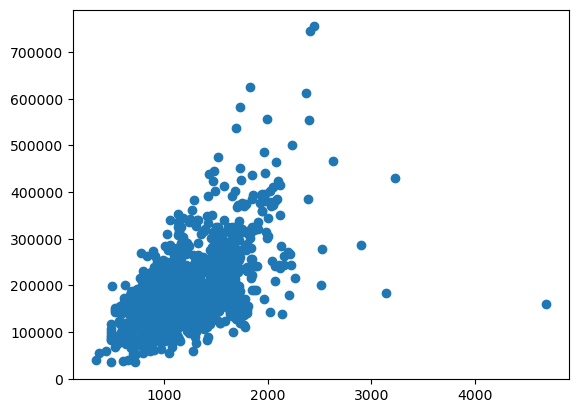

In [39]:
# 1st floor SF
plt.scatter(x='1stFlrSF', y='SalePrice', data=df_train)

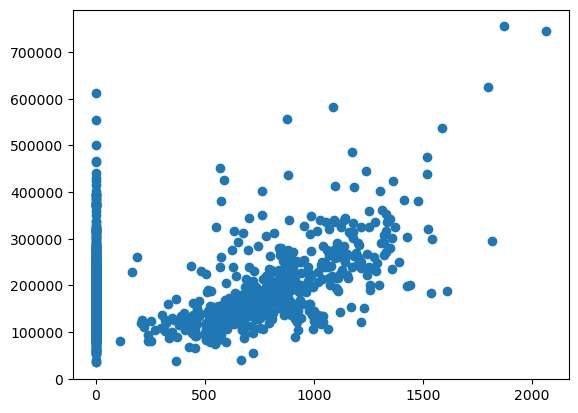

In [40]:
# 2nd floor SF
plt.scatter(x='2ndFlrSF', y='SalePrice', data=df_train)

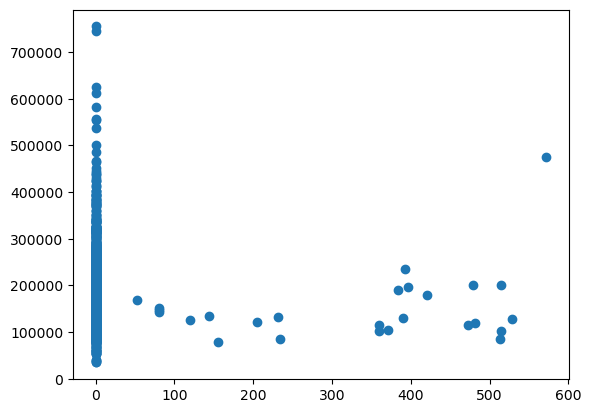

In [41]:
# Low Quality Finish SF
plt.scatter(x='LowQualFinSF', y='SalePrice', data=df_train)

In [42]:
# Querying
df_train.query('LowQualFinSF > 550')
# drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


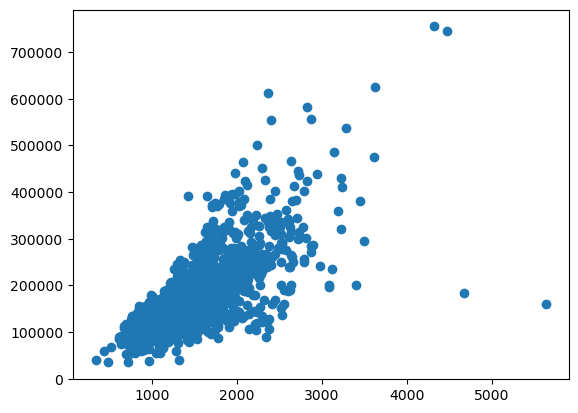

In [43]:
# Above grade living area sf
plt.scatter(x='GrLivArea', y='SalePrice', data=df_train)

In [44]:
#query
df_train.query('GrLivArea > 4000')
# All of these are already in the drop list

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


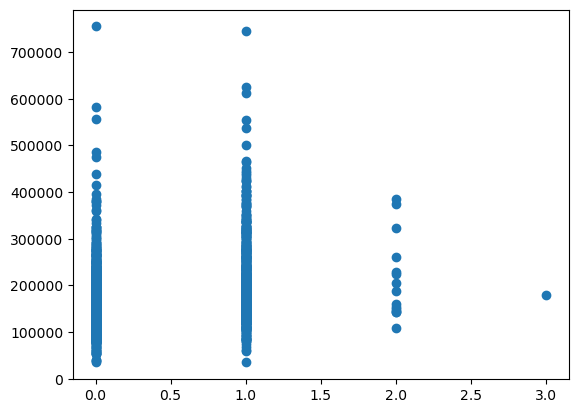

In [45]:
# Basement full bathrooms
plt.scatter(x='BsmtFullBath', y='SalePrice', data=df_train)

In [46]:
# Query
df_train.query('BsmtFullBath == 3')
# Maybe drop 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


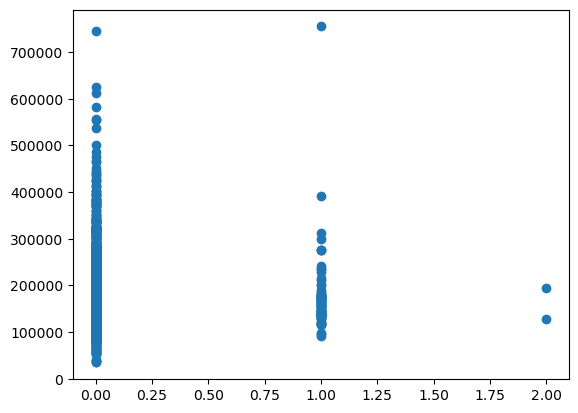

In [47]:
# Basement half bath
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=df_train)

In [48]:
# Querying
df_train.query('BsmtHalfBath == 1 & SalePrice > 700000')
# 692 is already on the drop list

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [49]:
# Querying
df_train.query('BsmtHalfBath == 2')
# Maybe drop 598, 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,598,120,RL,53.0,3922,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,New,Partial,194201
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


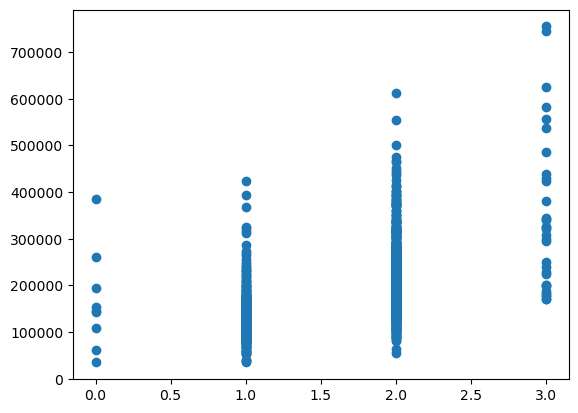

In [50]:
# Full Bathrooms
plt.scatter(x='FullBath', y='SalePrice', data=df_train)

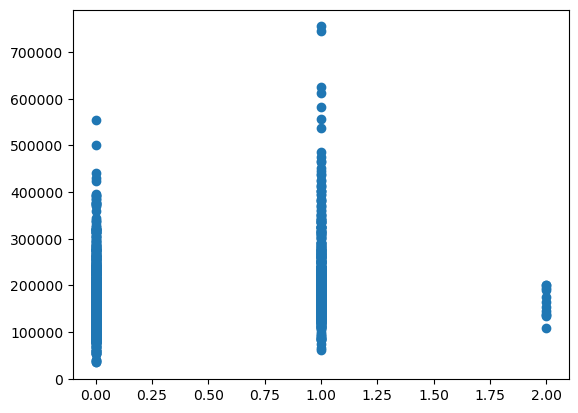

In [51]:
# Half bathrooms
plt.scatter(x='HalfBath', y='SalePrice', data=df_train)

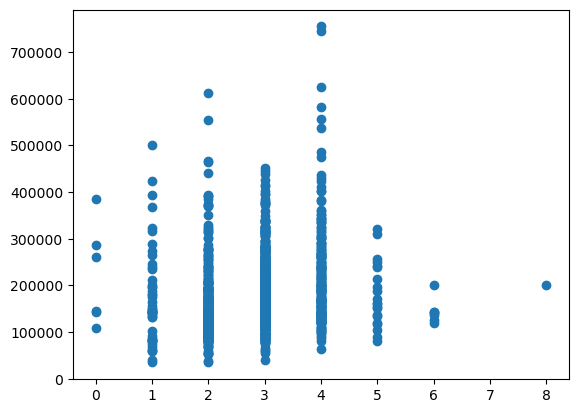

In [52]:
# Bedrooms
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=df_train)

In [53]:
# Query
df_train.query("BedroomAbvGr == 8")
# Maybe drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


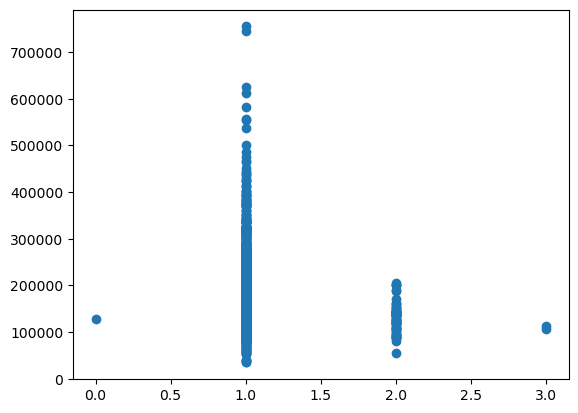

In [54]:
# Kitchen
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df_train)

In [55]:
# Query
df_train.query('KitchenAbvGr == 0')
# Drop 955

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
954,955,90,RL,35.0,9400,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,AdjLand,127500


In [56]:
# query
df_train.query('KitchenAbvGr == 3')
# Maybe drop 49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


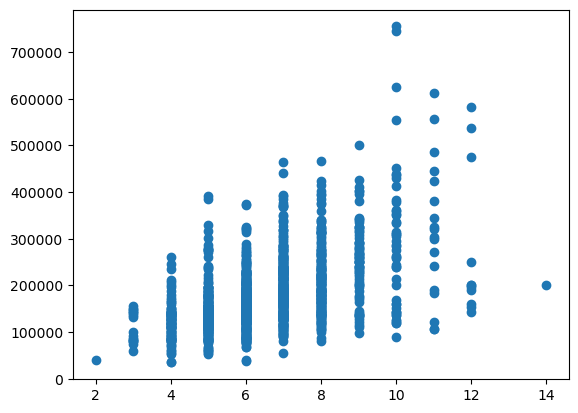

In [57]:
# Rooms
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df_train)

In [58]:
# query
df_train.query('TotRmsAbvGrd == 14')
# drop 636

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,636,190,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Abnorml,200000


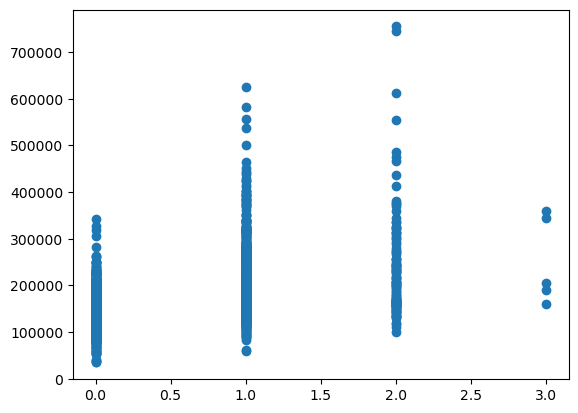

In [59]:
# Fireplaces
plt.scatter(x='Fireplaces', y='SalePrice', data=df_train)

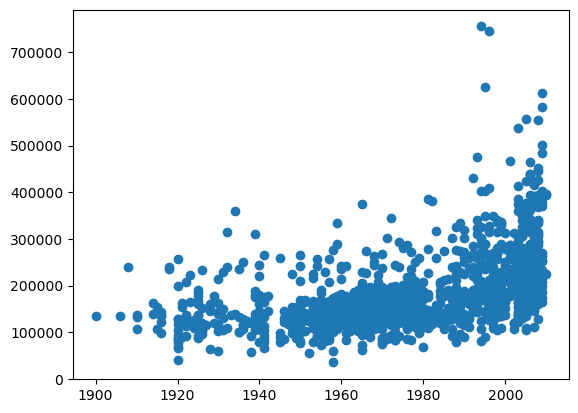

In [60]:
# garage year built
plt.scatter(x="GarageYrBlt", y='SalePrice', data=df_train)

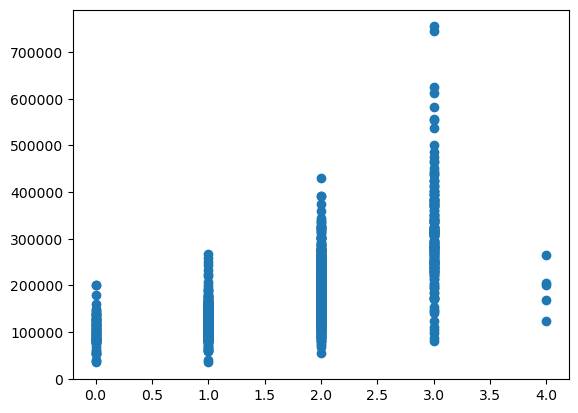

In [61]:
# garage car space
plt.scatter(x='GarageCars', y='SalePrice', data=df_train)

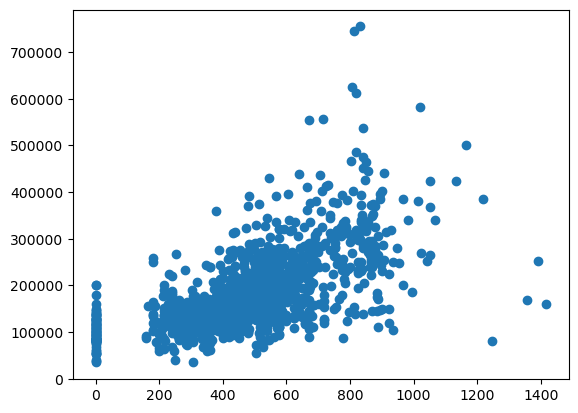

In [62]:
# Garage Area
plt.scatter(x='GarageArea', y='SalePrice', data=df_train)

In [63]:
# query
df_train.query('GarageArea > 1200')
# maybe drop 826

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


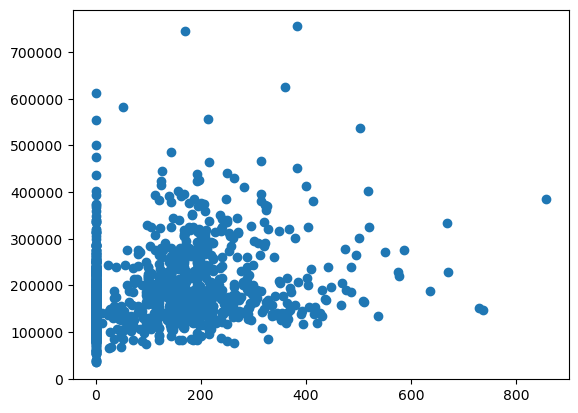

In [64]:
# Wood Deck SF
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df_train)

In [65]:
# query
df_train.query('WoodDeckSF > 800')
# Drop 54

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,54,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,385000


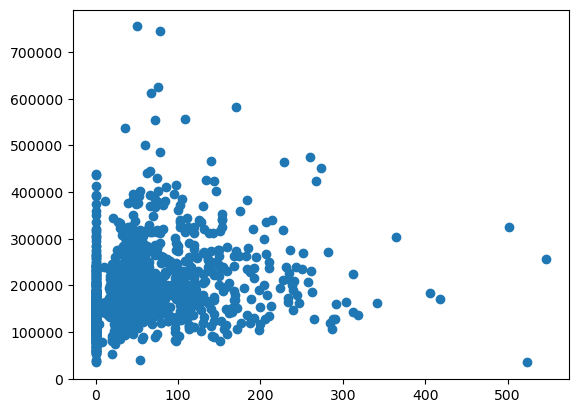

In [66]:
# Open Porch Sf
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df_train)

In [67]:
# query
df_train.query('OpenPorchSF > 450')
# drop 496
# maybe drop 584, 1329

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
583,584,75,RM,75.0,13500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,325000
1328,1329,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,1150,6,2008,WD,Normal,256000


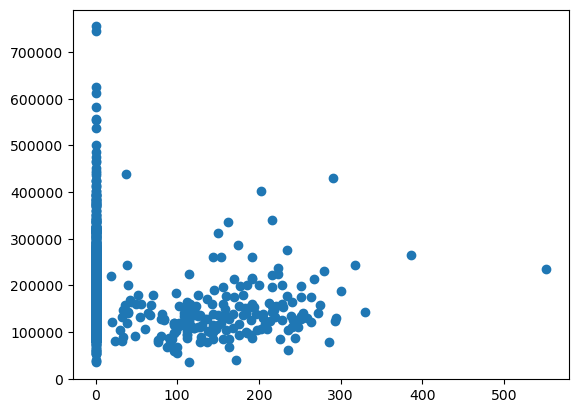

In [68]:
# Enclosed Porch
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df_train)

In [69]:
# query
df_train.query('EnclosedPorch > 500')
# drop 198

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000


In [70]:
# query
df_train.query('EnclosedPorch < 75 & EnclosedPorch > 5 & SalePrice > 400000')
# Drop 59

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780


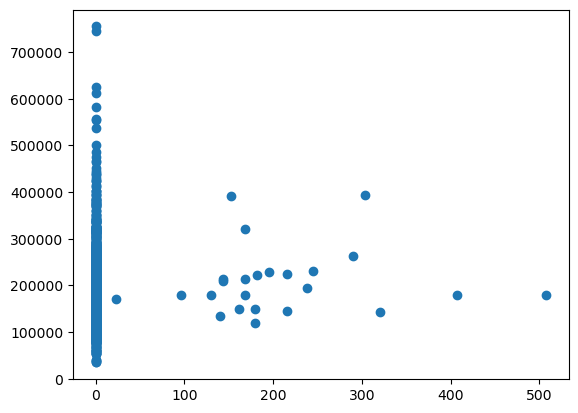

In [71]:
# Three season porch
plt.scatter(x='3SsnPorch', y='SalePrice', data=df_train)

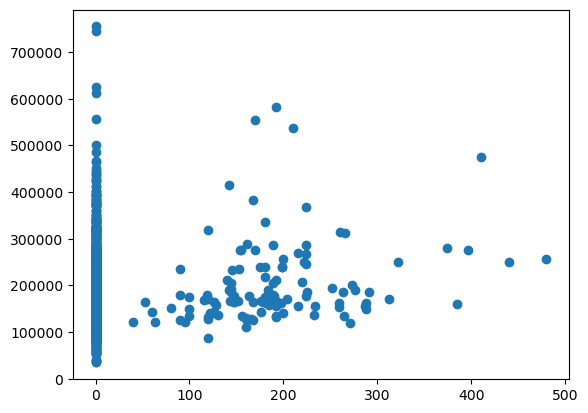

In [72]:
# Porches with screens
plt.scatter(x='ScreenPorch', y='SalePrice', data=df_train)


In [73]:
# query
df_train.query('SalePrice > 400000 & ScreenPorch > 100')
# Maybe drop 804, 770, 441

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
278,279,20,RL,107.0,14450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,New,Partial,415298
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933


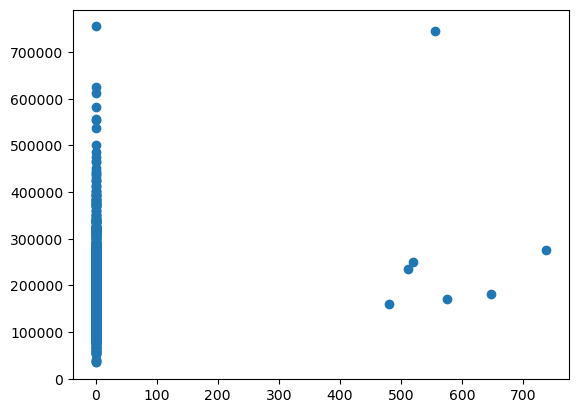

In [74]:
# Pool area
plt.scatter(x='PoolArea', y='SalePrice', data=df_train)

In [75]:
# query
df_train.query('PoolArea > 400')
# drop 1424

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


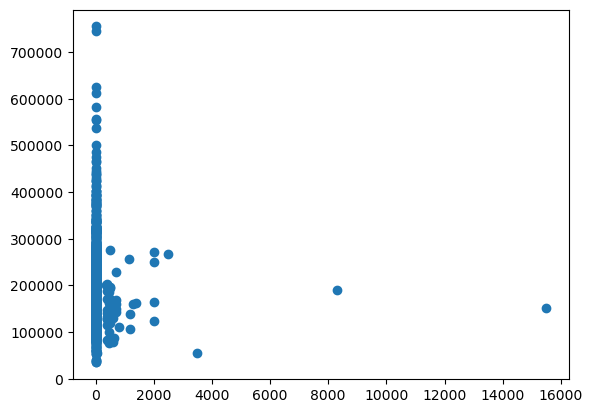

In [76]:
# Miscellanous value
plt.scatter(x='MiscVal', y='SalePrice', data=df_train)

In [77]:
# query
df_train.query('MiscVal > 3000')
# drop 706
# Maybe drop 347, 1231

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500
705,706,190,RM,70.0,5600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Othr,3500,7,2010,WD,Normal,55000
1230,1231,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000


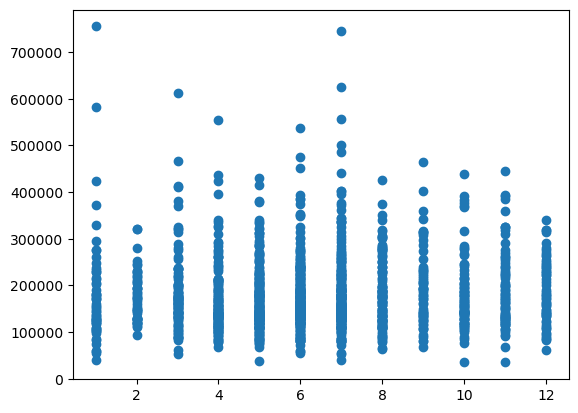

In [78]:
# Month sold
plt.scatter(x='MoSold', y='SalePrice', data=df_train)

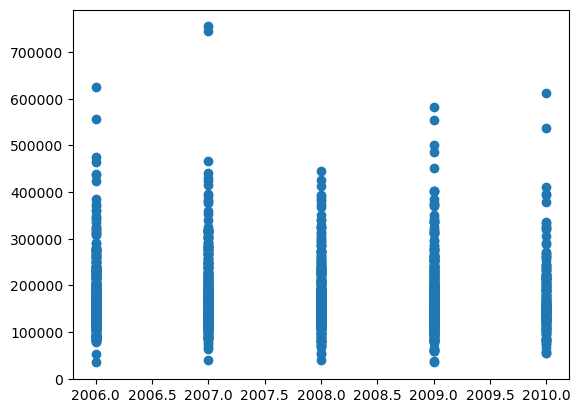

In [79]:
# year sold
plt.scatter('YrSold', y='SalePrice', data=df_train)

In [80]:
# grabbing our values
values = [935, 1299, 250, 314, 336, 707, 1397, 525, 1183, 379, 692, 739, 636, 826, 1329, 186, 323, 398, 49, 54, 584, 1170, 441, 955, 810, 496, 198, 59, 804, 770, 1424, 706, 347, 1231]

In [81]:
# Dropping everything in values from df_train
df_train = df_train[df_train.Id.isin(values) == False]


In [82]:
# now we are going to look at our null values
pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1423
MiscFeature,1378
Alley,1337
Fence,1153
MasVnrType,853
FireplaceQu,682
LotFrontage,252
GarageYrBlt,75
GarageCond,75
GarageType,75


In [83]:
# Missing a lot of data with PoolQC so we can drop it


In [84]:
# Breaking down Misc features
df_train['MiscFeature'].unique()

array([nan, 'Shed', 'Othr', 'TenC'], dtype=object)

In [85]:
# breaking down alley
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [86]:
# Creating a box plot for alley
df_train['Alley'].fillna('No', inplace=True)
df_test['Alley'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1435254094.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Alley'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1435254094.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

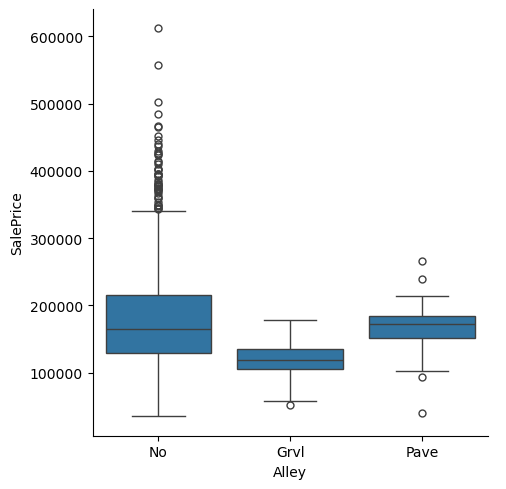

In [87]:
sns.catplot(data=df_train, x="Alley", y='SalePrice', kind='box')

In [88]:
# How many have gravel
df_train.query('Alley == "Grvl"').count()

Id               49
MSSubClass       49
MSZoning         49
LotFrontage      46
LotArea          49
                 ..
MoSold           49
YrSold           49
SaleType         49
SaleCondition    49
SalePrice        49
Length: 81, dtype: int64

In [89]:
# types of fences
df_train['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [90]:
df_train['Fence'].fillna('No', inplace=True)
df_test['Fence'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1963424885.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Fence'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1963424885.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

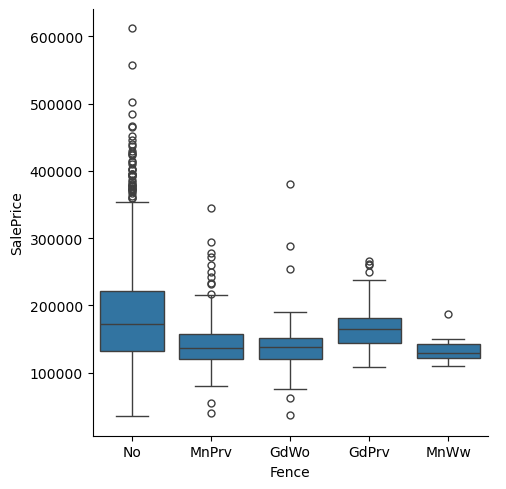

In [91]:
sns.catplot(data=df_train, x='Fence', y='SalePrice', kind='box')

In [92]:
df_train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [93]:
df_train['MasVnrType'].fillna('No', inplace=True)
df_test['MasVnrType'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/552823757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MasVnrType'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/552823757.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

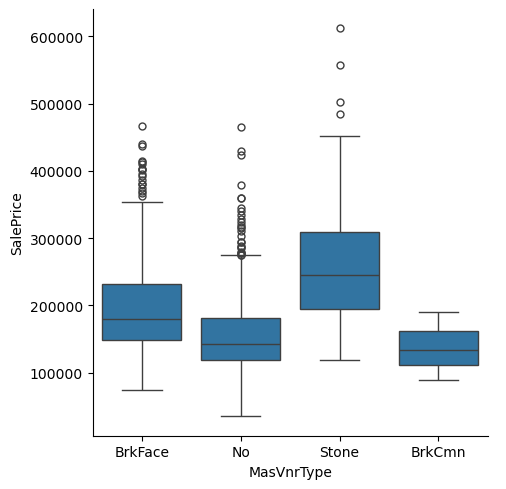

In [94]:
sns.catplot(data=df_train, x='MasVnrType', y='SalePrice', kind='box')

In [95]:
df_train['MasVnrArea'].fillna(0, inplace=True)
df_test['MasVnrArea'].fillna(0, inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2058723589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MasVnrArea'].fillna(0, inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2058723589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [96]:
df_train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [97]:
df_train['FireplaceQu'].fillna("No", inplace=True)
df_test['FireplaceQu'].fillna("No", inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3724775283.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['FireplaceQu'].fillna("No", inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3724775283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

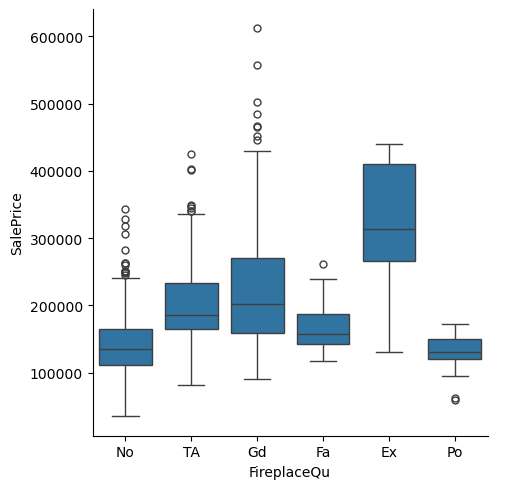

In [98]:
sns.catplot(data=df_train, x='FireplaceQu', y='SalePrice', kind='box')

In [99]:
df_train['LotFrontage'].fillna(0, inplace=True)
df_test['LotFrontage'].fillna(0, inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2366035126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LotFrontage'].fillna(0, inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2366035126.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [100]:
df_train['GarageYrBlt'].corr(df_train['YearBuilt'])

0.8290352510979058

In [101]:
df_train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [102]:
df_train['GarageCond'].fillna('No', inplace=True)
df_train['GarageCond'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3356672518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageCond'].fillna('No', inplace=True)


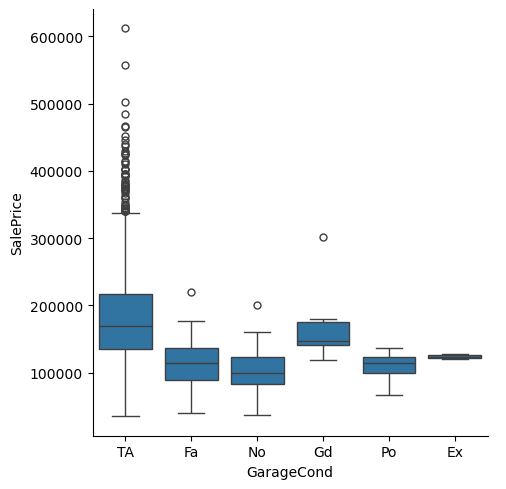

In [103]:
sns.catplot(data=df_train, x='GarageCond', y='SalePrice', kind='box')

In [104]:
df_train['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [105]:
df_train['GarageType'].fillna('No', inplace=True)
df_test['GarageType'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1027747612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageType'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1027747612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

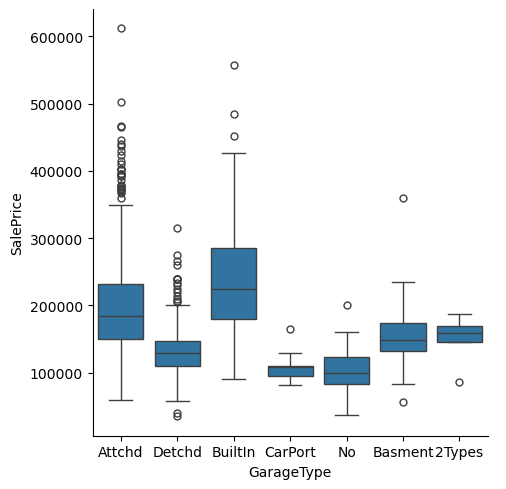

In [106]:
sns.catplot(data=df_train, x='GarageType', y='SalePrice', kind='box')

In [107]:
df_train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [108]:
df_train['GarageFinish'].fillna('No', inplace=True)
df_test['GarageFinish'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2916835874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageFinish'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2916835874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

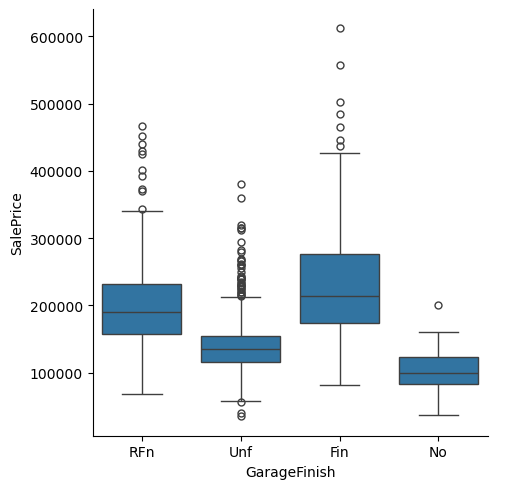

In [109]:
sns.catplot(data=df_train, x='GarageFinish', y='SalePrice', kind='box')

In [110]:
df_train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Po', 'Ex'], dtype=object)

In [111]:
df_train['GarageQual'].fillna('No', inplace=True)
df_test['GarageQual'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3525643535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['GarageQual'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3525643535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

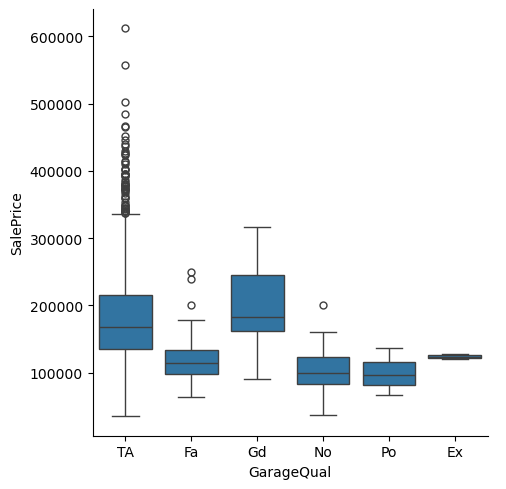

In [112]:
sns.catplot(data=df_train, x='GarageQual', y='SalePrice', kind='box')

In [113]:
df_train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [114]:
df_train['BsmtFinType2'].fillna('Unf', inplace=True)
df_test['BsmtFinType2'].fillna('Unf', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1118577788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtFinType2'].fillna('Unf', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/1118577788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

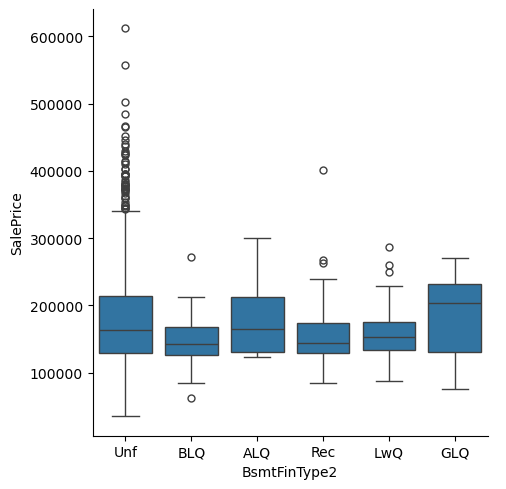

In [115]:
sns.catplot(data=df_train, x='BsmtFinType2', y='SalePrice', kind='box')

In [116]:
df_train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [117]:
df_train['BsmtExposure'].fillna('No', inplace=True)
df_test['BsmtExposure'].fillna('No', inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/317238042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['BsmtExposure'].fillna('No', inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/317238042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

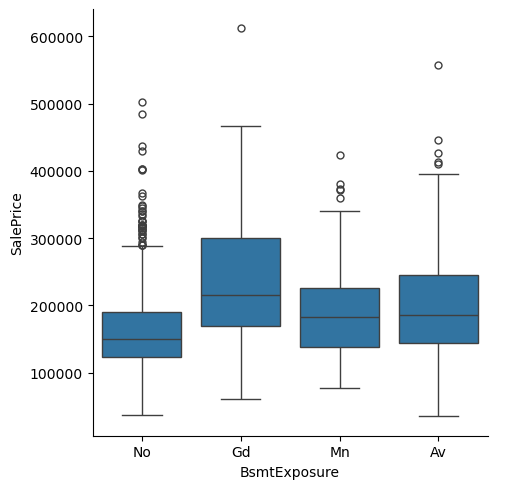

In [118]:
sns.catplot(data=df_train, x='BsmtExposure', y='SalePrice', kind='box')

In [119]:
df_train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [121]:
df_train['BsmtQual'].fillna('No', inplace=True)
df_test['BsmtQual'].fillna('No', inplace=True)

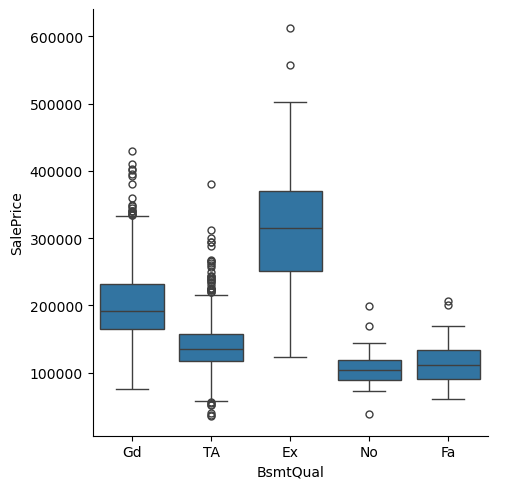

In [123]:
sns.catplot(data=df_train, x='BsmtQual', y='SalePrice', kind='box')

In [124]:
df_train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [125]:
df_train['BsmtCond'].fillna('No', inplace=True)
df_test['BsmtCond'].fillna('No', inplace=True)

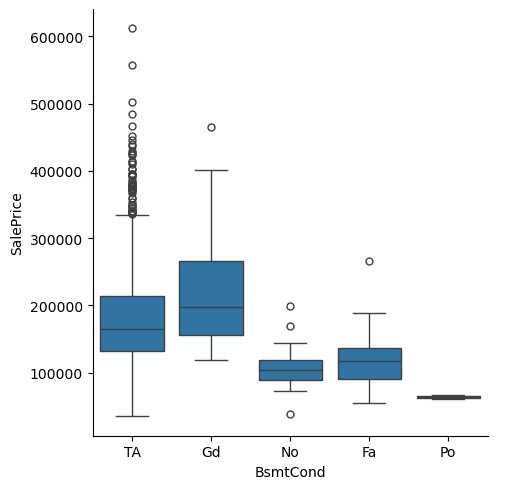

In [127]:
sns.catplot(data=df_train, x='BsmtCond', y='SalePrice', kind='box')

In [128]:
df_train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [129]:
df_train['BsmtFinType1'].fillna('Unf', inplace=True)
df_train['BsmtFinType1'].fillna('Unf', inplace=True)

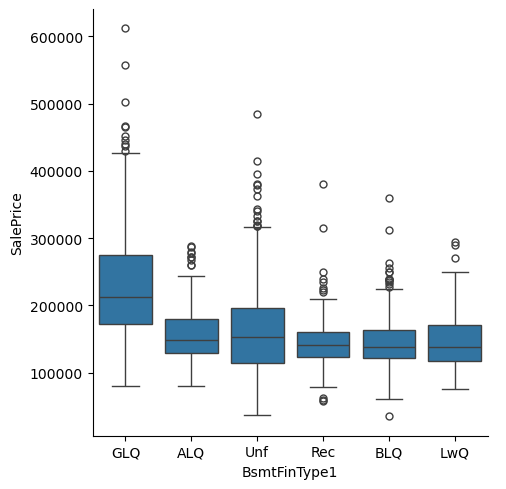

In [130]:
sns.catplot(data=df_train, x='BsmtFinType1', y='SalePrice', kind='box')

In [131]:
df_train['MasVnrArea'].fillna(0, inplace=True)
df_test['MasVnrArea'].fillna(0, inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2058723589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['MasVnrArea'].fillna(0, inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/2058723589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [132]:
df_train['Electrical'].fillna(0, inplace=True)
df_test['Electrical'].fillna(0, inplace=True)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3588728866.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Electrical'].fillna(0, inplace=True)
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_89569/3588728866.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [141]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3Ssn

In [142]:
# Dropping values from above
df_train = df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'], errors='ignore')
df_test = df_test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2'], errors='ignore')

In [ ]:
# feature engineering

In [149]:
df_train['houseage'] = df_train['YrSold'] - df_train['YearBuilt']
df_test['houseage'] = df_test['YrSold'] - df_test['YearBuilt']

In [150]:
df_train['houseremodelage'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_test['houseremodelage'] = df_test['YrSold'] - df_test['YearRemodAdd']

In [151]:
df_train['totalsf'] = df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['BsmtFinSF1'] + df_train['BsmtFinSF1']
df_test['totalsf'] = df_test['1stFlrSF'] + df_test['2ndFlrSF'] + df_test['BsmtFinSF1'] + df_test['BsmtFinSF1']

In [152]:
df_train['totalarea'] = df_train['GrLivArea'] + df_train['TotalBsmtSF']
df_test['totalarea'] = df_test['GrLivArea'] + df_test['TotalBsmtSF']

In [155]:
df_train['totalbaths'] = df_train['BsmtFullBath'] + df_train['FullBath'] + (0.5 * (df_train['BsmtHalfBath'] + df_train['HalfBath']))
df_test['totalbaths'] = df_test['BsmtFullBath'] + df_test['FullBath'] + 0.5 * (df_test['BsmtHalfBath'] + df_test['HalfBath'])

In [156]:
df_train['totalporchsf'] = df_train['OpenPorchSF'] + df_train['3SsnPorch'] + df_train['EnclosedPorch'] + df_train['ScreenPorch'] + df_train['WoodDeckSF']
df_test['totalporchsf'] = df_test['OpenPorchSF'] + df_test['3SsnPorch'] + df_test['EnclosedPorch'] + df_test['ScreenPorch'] + df_train['WoodDeckSF']

In [160]:
# Dropping columns
df_train = df_train.drop(columns=['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorch', '3SnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'GarageArea'], errors='ignore')
df_test = df_test.drop(columns=['Id', 'YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF', 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorch', '3SnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF', 'GarageArea'], errors='ignore')

<Axes: >

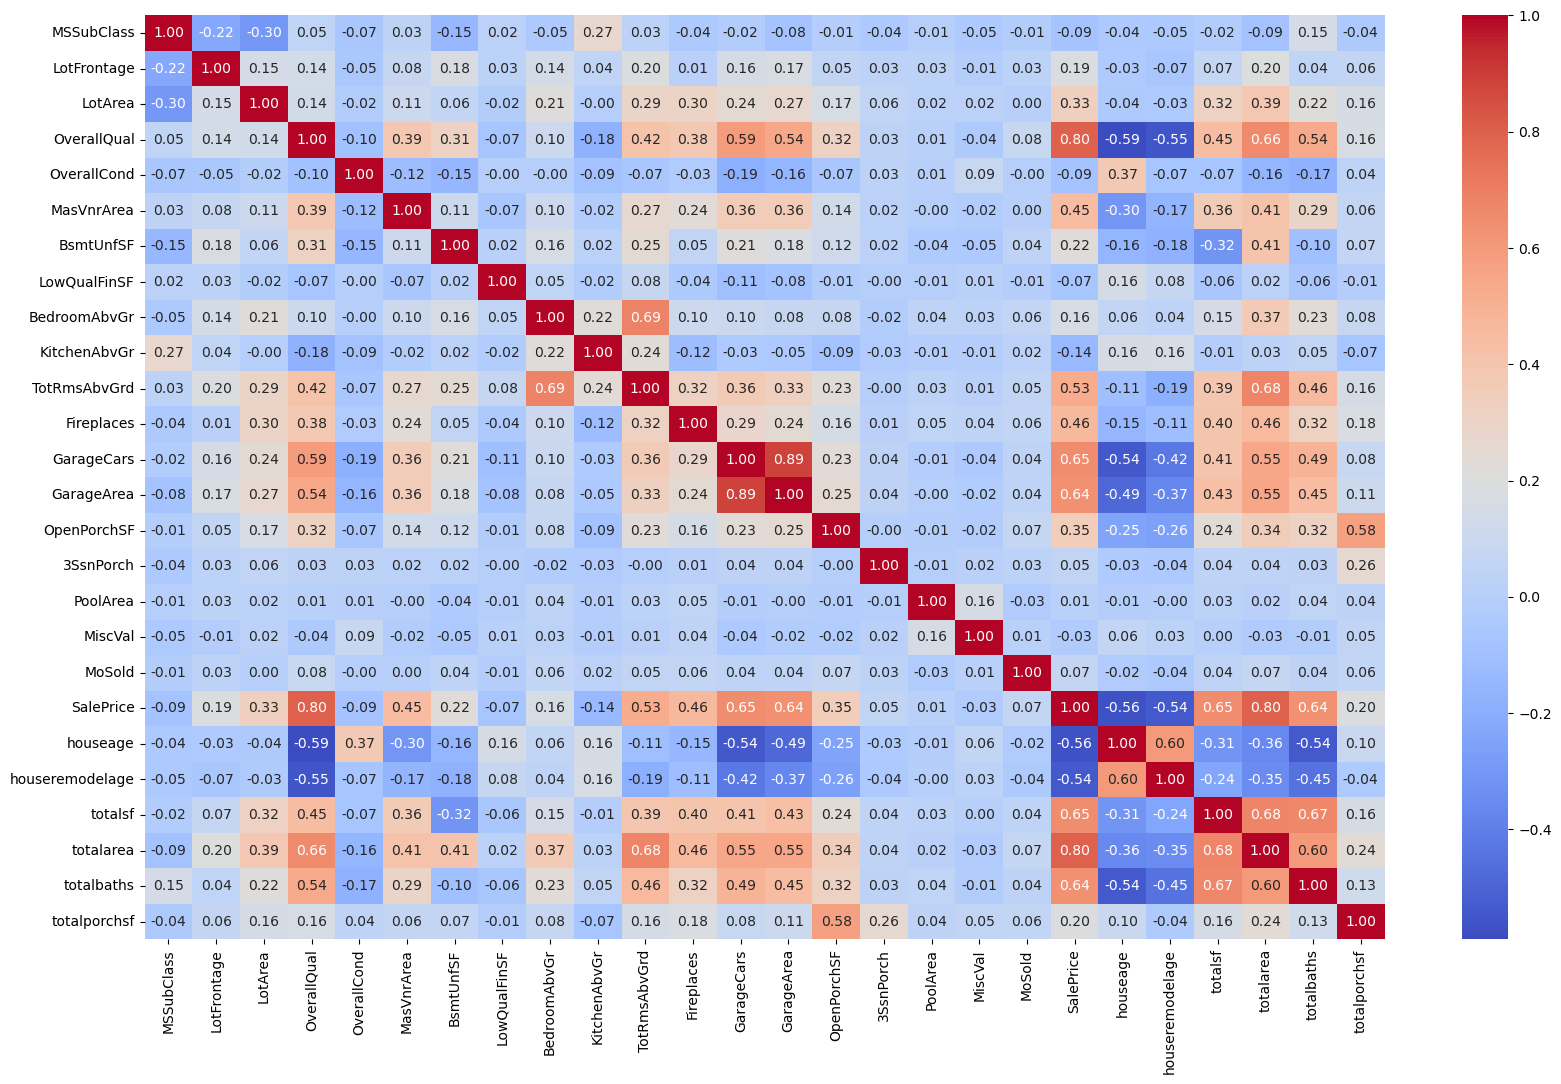

In [159]:
correlation_matrix = df_train.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [161]:
# Drop GarageArea
#Dropped above